[-13, -236, -132, -15, -19, -226, -13, -238, -340, -13]

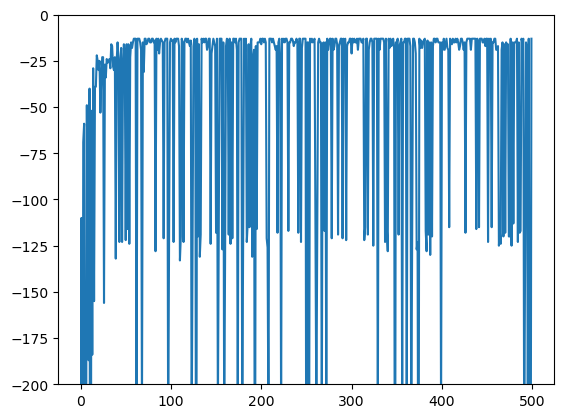

In [47]:
import numpy as np
import matplotlib.pyplot as plt

class CliffWalking:
    def __init__(self) -> None:
        self.height = 4
        self.width = 12
        self.start = (0,0)#row, col
        self.end = (0,11)#row, col
        self.position = list(self.start)

    def state_space(self):
        return (self.height, self.width)
    
    def action_space(self):
        return 4

    def reset(self):
        self.position[:] = self.start
        return self.start

    def step(self, action):
        match action:
            case 0:#down
                self.position[0] = max(self.position[0]-1, 0)
            case 1:#up
                self.position[0] = min(self.position[0]+1, self.height - 1)
            case 2:#left
                self.position[1] = max(self.position[1]-1, 0)
            case 3:#right
                self.position[1] = min(self.position[1]+1, self.width - 1)
        reward = -1
        if self.position[0] == 0 and self.position[1] > 0 and self.position[1] < self.width - 1:
            reward = -100
            self.position[:] = self.start
        terminated = self.position[0] == 0 and self.position[1] == self.width - 1
        #print("pos ",self.position, action)
        return terminated, tuple(self.position), reward


def sarsa(env, num_episodes, alpha, epsilon = 0.1, gamma = 1.0):
    state_shape = env.state_space()
    action_shape = env.action_space()
    q_shape = state_shape + (action_shape,)
    qs = np.zeros(q_shape)
    rewards_stat = []
    for episode in range(num_episodes):
        rewards = 0
        state = env.reset()
        if np.random.random() < epsilon:
            action = np.random.choice(action_shape)
        else:
            action = qs[state].argmax()
        while True:
            terminated, next_state, reward = env.step(action)
            rewards += reward
            if terminated:
                q_prime = 0
            else:
                if np.random.random() < epsilon:
                    next_action = np.random.choice(action_shape)
                else:
                    next_action = qs[next_state].argmax()
                q_prime = qs[next_state][next_action]
            qs[state][action] += (reward + q_prime*gamma - qs[state][action])*alpha
            state = next_state
            action = next_action
            if terminated:
                break
        rewards_stat.append(rewards)
    return qs.argmax(2), rewards_stat

def q_learning(env, num_episodes, alpha, epsilon = 0.1, gamma = 1.0):
    state_shape = env.state_space()
    action_shape = env.action_space()
    q_shape = state_shape + (action_shape,)
    qs = np.zeros(q_shape)
    rewards_stat = []
    for episode in range(num_episodes):
        rewards = 0
        state = env.reset()
        while True:
            if np.random.random() < epsilon:
                action = np.random.choice(action_shape)
            else:
                action = qs[state].argmax()
            terminated, next_state, reward = env.step(action)
            rewards += reward
            if terminated:
                q_prime = 0
            else:
                q_prime = qs[next_state].max()
            qs[state][action] += (reward + q_prime * gamma - qs[state][action]) * alpha
            state = next_state
            if terminated:
                break
        rewards_stat.append(rewards)
    return qs.argmax(2), rewards_stat


#plt.ylim((-200,0))
env = CliffWalking()
#policy, rewards_stat =  sarsa(env, 500, 0.5)
#plt.plot(range(len(rewards_stat)),rewards_stat)
policy, rewards_stat =  q_learning(env, 500, 0.5)
plt.plot(range(len(rewards_stat)),rewards_stat)
rewards_stat[-10:]